 <h2 align="center">EDSA Movie Recommendation Challenge</h2> 
 


 <h2 align="center">Team ZM5</h2> 


<div align="center" style="width: 900px; font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F2205222%2Fbca114f2e4f6b9b46f2cc76527d7401e%2FImage_header.png?generation=1593773828621598&alt=media"
     alt="Barnicles on your ship :( "
     style="float: center; padding-bottom=0.5em"
     width=900px/>

</div>

 <h2 align="center">Jupyter Notebook Table Of Content</h2> 

<a id="TOC"></a>
- [1) Introduction](#1)
  * [1.1) Problem Statement](#2)
  * [1.2)  Objectives](#3)
- [2) Importing Libraries](#4)
- [3) Loading dataset](#5)
- [4) Connecting To Comet](#6)
- [5) Exploratory Data Analysis (EDA)](#7)
  * [5.1) Detailed Dataset Overview](#8)
    * [5.1.1) Movie dataframe Overview](#9)
    * [5.1.2) IMdb dataframe Overview](#10)
    * [5.1.3) Genome Scores dataframe Overview](#11)
    * [5.1.4) Genome Tags dataframe Overview](#12)
    * [5.1.5) Tags dataframe Overview](#13)
    * [5.1.6) Links dataframe Overview](#14)
    * [5.1.7) train dataframe Overview](#15)
  * [5.2) Data visualisation](#16)
    * [5.2.1) Popular Movie Genre](#17)
    * [5.2.2) Popular Actors](#18)
    * [5.2.3) Popular Movie Directors](#19)
    * [5.2.4) Popular Play Plot](#20)
    * [5.2.5) Number of Movies Produced annually](#21)
    * [5.2.6) Movies tags plot annually](#22)
    * [5.2.7) Merging Movies and IMdb Dataframe](#23)
    * [5.2.8) Movies Budget Anually ](#24)
    * [5.2.9) User Movie rating plots ](#25)
- [6) Data Preprocessing](#26)
- [7) Modelling](#27)
  * [Model 1](#28)
  * [Model 2](#29)
  * [Model 3](#30)
- [8) Tuning The Best Model](#31)
- [9) Submission](#34) 
- [10) Model Pickling](#35)
- [11) Conclusion](#36)


## 1 ) Introduction

###  1.1 ) Problem Statement

In today’s technology driven world, recommender systems are socially and economically critical for ensuring that individuals can make appropriate choices surrounding the content they engage with on a daily basis. One application where this is especially true surrounds movie content recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.

The task then becomes to construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed based on their historical preferences.

Providing an accurate and robust solution has immense economic potential, with users of the system being exposed to content they would like to view or purchase - generating revenue and platform affinity.

### 1.2 ) Project Objectives

- To develop the best /effecient movie recommend.
- To compare contest-based and collaborating filtering in.

- To obtain an optimum unsupervised machine learning model with  RSME lower than 0.85 on the complete test set.

###  1.3 ) Data Overview

This dataset consists of several million 5-star ratings obtained from users of the online MovieLens movie recommendation service. The MovieLens dataset has long been used by industry and academic researchers to improve the performance of explicitly-based recommender systems, and now you get to as well!

For this Predict, we'll be using a special version of the MovieLens dataset which has enriched with additional data, and resampled for fair evaluation purposes.

## 2 ) Importing Libraries

In [249]:
#!pip install wget
#!conda install -c conda-forge scikit-surprise
#!pip install wordcloud

In [753]:
# Install packages here
# Packages for data processing
import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
from scipy.sparse import csr_matrix
import scipy as sp

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.4)
sns.set_style("darkgrid")
%matplotlib inline

# Packages for modeling
#from surprise import Reader
#from surprise import Dataset
#from surprise import KNNWithMeans
#from surprise import KNNBasic
#from surprise.model_selection import cross_validate
#from surprise.model_selection import GridSearchCV
#from surprise import SVD
#from surprise import SVDpp
#from surprise import NMF
#from surprise import SlopeOne
#from surprise import CoClustering
import heapq

# Packages for model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from time import time

# Package to suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Packages for saving models
import pickle

# Others
import os



from wordcloud import WordCloud
from re import sub
from decimal import Decimal
import locale
locale.setlocale(locale.LC_ALL, 'en_US.UTF8')

'en_US.UTF8'

 ## 3 ) Loading the Dataset

In [2]:
#df_sample_submission = pd.read_csv('/kaggle/input/edsa-movie-recommendation-challenge/sample_submission.csv')
df_movies = pd.read_csv('movies.csv')
df_imdb = pd.read_csv('imdb_data.csv')
df_genome_scores = pd.read_csv('genome_scores.csv')
df_genome_tags = pd.read_csv('genome_tags.csv')
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_tags = pd.read_csv('tags.csv')
df_links = pd.read_csv('links.csv')

## 4) Connecting to Comet

## 5) Explore Data Analyses

### 5.1) Detailed  Dataset Overview

### 5.1.1) Movie Dataframe Overview

In [3]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


#### Movie dataframe information

In [4]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [5]:
df_movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

### Movie dataframe insight

 Movie dataframe has :
 * Three  features 1) movieId ,2) title  and 3) genres
 * The dataframe has 62423 observations
 * The dataframe has no cell with missing data
 * The dataframe has a mamory usage of 1.4MB

### 5.1.2) IMdb Dataframe Overview

In [6]:
df_imdb.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [7]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


In [8]:
df_imdb.isnull().sum()

movieId              0
title_cast       10068
director          9874
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64

### IMdb dataframe insight

 IMdb dataframe has :
 * Six  features  namely  movieId, title_cast, director, runtime, budget and play_keywords
 * The dataframe has 27278 cells of observations 
 * The title_cast feature has 17210 observations and 10068 missing observations
 * The director feature has 17404 observations and  9874 missing observations
 * The runtime feature has 15189 observations and 12089 missing observations
 * The budget feature has 7906 observations and  19372 missing observations
 * The plot_keywords feature has 16200 observations and  11078 missing observations
 * The dataframe has a mamory usage of 1.2MB

### 5.1.2) Genome Scores Dataframe Overview

In [9]:
df_genome_scores.head()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [10]:
df_genome_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15584448 entries, 0 to 15584447
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
dtypes: float64(1), int64(2)
memory usage: 356.7 MB


In [11]:
df_genome_scores.isnull().sum()

movieId      0
tagId        0
relevance    0
dtype: int64

### Genome Scores dataframe insight

Genome Scores  dataframe has :
 * Three  features 1) movieId ,2) tagId  and 3) relevance
 * The dataframe has 15584448  observations
 * The dataframe has no cell with missing data
 * The dataframe has a mamory usage of 356.7MB

### 5.1.3) Genome Tags Dataframe Overview

In [12]:
df_genome_tags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [13]:
df_genome_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   1128 non-null   int64 
 1   tag     1128 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.8+ KB


In [14]:
df_genome_tags.isnull().sum()

tagId    0
tag      0
dtype: int64

### Genome Tags dataframe insight

Genome Scores  dataframe has :
 * Three  features 1) tagId and 2) tag
 * The dataframe has 1128  observations
 * The dataframe has no cell with missing data
 * The dataframe has a mamory usage of 17.8KB

### 5.1.4) Tags Dataframe Overview

In [15]:
df_tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [16]:
df_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093360 entries, 0 to 1093359
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   userId     1093360 non-null  int64 
 1   movieId    1093360 non-null  int64 
 2   tag        1093344 non-null  object
 3   timestamp  1093360 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 33.4+ MB


In [17]:
df_tags.isnull().sum()

userId        0
movieId       0
tag          16
timestamp     0
dtype: int64

### Tags dataframe insight

Tags dataframe has :
 * Four  features 1) userId, 2) movieId , 3) tag and 4) timestamp 
 * The dataframe has  1093360  observations
 * The tag feature has 16 missing observations
 * The dataframe has a mamory usage of 33.5MB

### 5.1.5) Link Dataframe Overview

In [18]:
df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [19]:
df_links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  62423 non-null  int64  
 1   imdbId   62423 non-null  int64  
 2   tmdbId   62316 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.4 MB


In [20]:
df_links.isnull().sum()

movieId      0
imdbId       0
tmdbId     107
dtype: int64

### Links dataframe insight

Genome Scores  dataframe has :
 * Three  features 1) movieId , 2) imdbId and 3) tmbId
 * The dataframe has 62423 observations
 * The tmdbIdfeature has 107 messing observations
 * The dataframe has a mamory usage of 1.4MB

### 5.1.6) Train Dataframe Overview

In [21]:
df_train.head() 

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


In [23]:
df_train.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

### Train dataframe insight

Train  dataframe has :
 * Four  features 1) userIdId , 2) movieId , 3) rating and 4) timestamp
 * The dataframe has 10000038   observations
 * The dataframe has no cell with missing data
 * The dataframe has a mamory usage of 305.2MB

## 5.2 ) Data Visualisation

### 5.2.1) Popular  Movie Genre Plot

In [24]:
# Create dataframe containing only the movieId and genres
movies_genres = pd.DataFrame(df_movies[['movieId', 'genres']],columns=['movieId', 'genres'])

# Split genres seperated by "|" and create a list containing the genres allocated to each movie
movies_genres.genres = movies_genres.genres.apply(lambda x: x.split('|'))

# Create expanded dataframe where each movie-genre combination is in a seperate row
movies_genres = pd.DataFrame([(tup.movieId, d) for tup in movies_genres.itertuples() for d in tup.genres],
                             columns=['movieId', 'genres'])

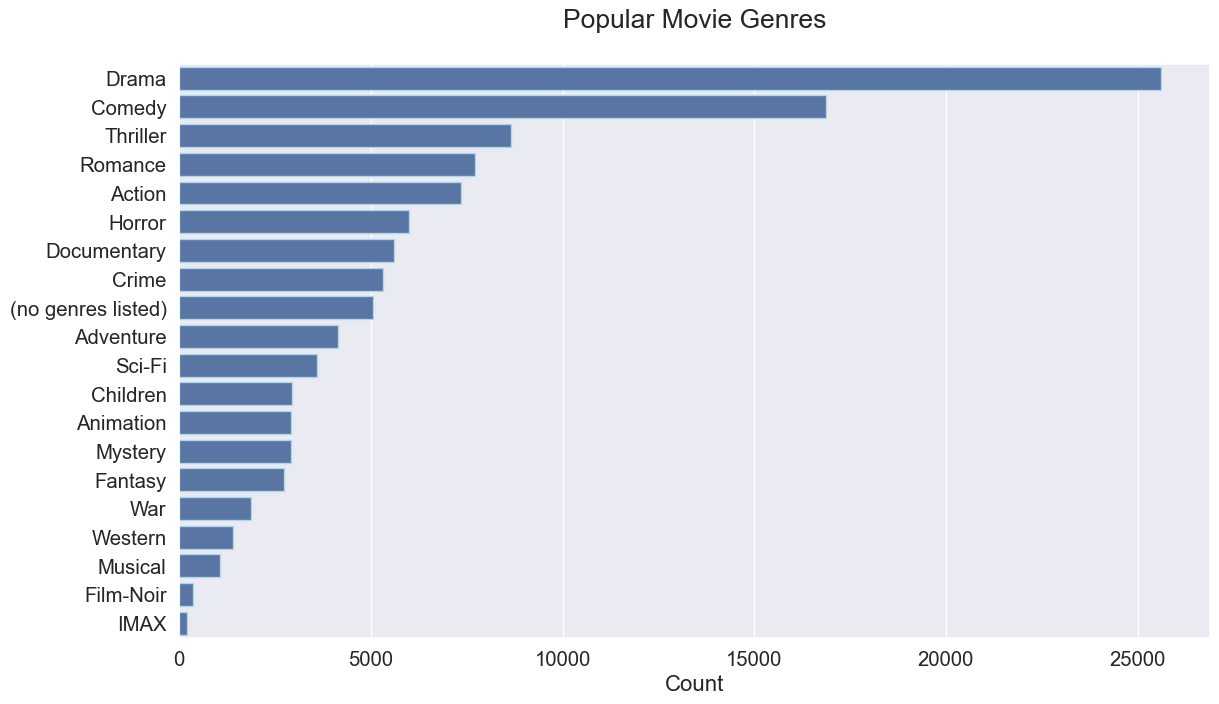

In [794]:
# Plot the genres from most common to 90 common
plot = plt.figure(figsize=(14, 8), dpi =95)
plt.title('Popular Movie Genres\n', fontsize=20)
sns.countplot(y="genres", data=movies_genres,order=movies_genres['genres']
              .value_counts(ascending=False).index, color='b', ec= 'lightblue')
plt.ylabel('')
plt.xlabel('Count')
plt.show()

### 5.2.2) Popular Actors  Plot

In [400]:
movies_actor = pd.DataFrame(df_imdb[['movieId', 'title_cast']],columns=['movieId', 'title_cast'])

# Split title_cast seperated by "|" and create a list containing the title_cast allocated to each movie
movies_actor= movies_actor[movies_actor['title_cast'].notnull()]
movies_actor.title_cast = movies_actor.title_cast.apply(lambda x: x.split('|'))

# Create expanded dataframe where each movie-tite_cast combination is in a seperate row
movies_actor = pd.DataFrame([(tup.movieId, d) for tup in movies_actor.itertuples() for d in tup.title_cast],columns=['movieId','title_cast'])

movies_actor = movies_actor.groupby(['title_cast'])['movieId'].count().reset_index(name='Number of Movies')
movies_actor =movies_actor.sort_values(by='Number of Movies',ascending=False)

#Sececting the Top 20 actors in movies
movies_actor = movies_actor .head(20)
movies_actor =movies_actor.sort_values(by='Number of Movies',ascending=True)


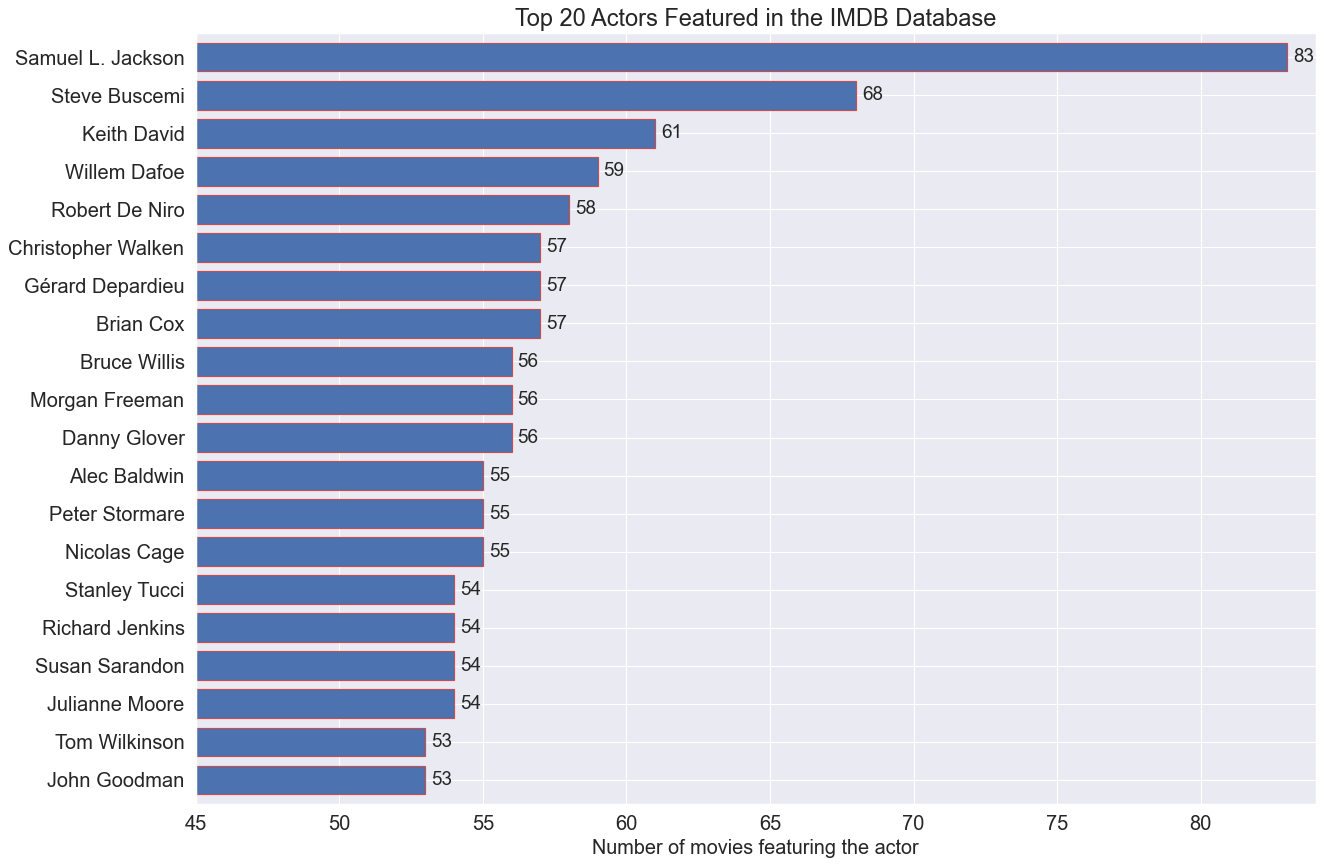

In [796]:
y_labels =movies_actor['title_cast']

# Plot the figure.
plt.figure(figsize=(17, 12),dpi =85)
ax = movies_actor['Number of Movies'].plot(kind='barh',color='b', fontsize=17,
                                           edgecolor='r', xlim=[45,84], width=.75)
ax.set_title('Top 20 Actors Featured in the IMDB Database', fontsize=20)
ax.set_xlabel('Number of movies featuring the actor')
ax.set_ylabel('')
ax.set_yticklabels(y_labels)
rects = ax.patches

for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'
    if x_value < 0:
        space *= -1
        ha = 'right'
    
    label = "{}".format(x_value)
    plt.annotate(label,(x_value, y_value),xytext=(space, 0),fontsize=16,
                 textcoords="offset points",va='center',ha=ha)            
                                 
        
    

### 5.2.3) Popular Movie directors 

In [516]:

## grouping the movies by the director and counting the total number of movies per director
movies_director = pd.DataFrame(df_imdb[['movieId', 'director']],columns=['movieId', 'director'])

movies_director  = movies_director.groupby(['director'])['movieId'].count().reset_index(name="count")
movies_director =movies_director.sort_values(by='count',ascending=False)

movies_director = movies_director .head(20)
movies_director =movies_director.sort_values(by='count',ascending=True)

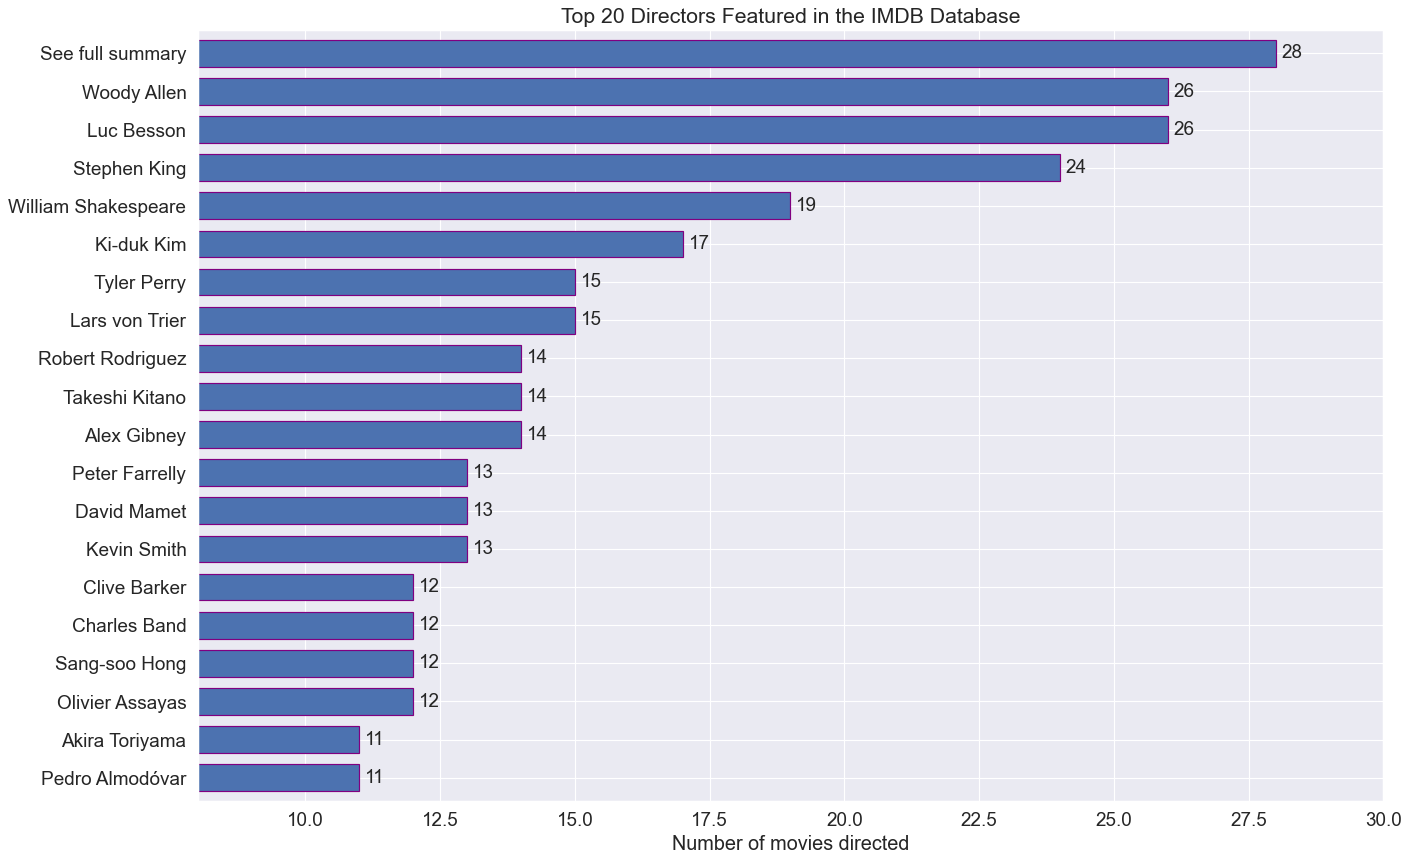

In [791]:
y_labels =movies_director['director']

# Plot the figure.
plt.figure(figsize=(18, 12), dpi =85)
ax = movies_director['count'].plot(kind='barh',color='b', edgecolor='purple', 
                                   width=.7, fontsize=16, xlim=[8,30])
ax.set_title('Top 20 Directors Featured in the IMDB Database', fontsize=18)
ax.set_xlabel('Number of movies directed')
ax.set_ylabel('')
ax.set_yticklabels(y_labels)

rects = ax.patches

for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    if x_value < 0:
        space *= -1
        ha = 'right'
    label = "{}".format(x_value)

    # Create annotation
    plt.annotate(label,(x_value, y_value),xytext=(space, 0),textcoords="offset points"
                 ,va='center',ha=ha, fontsize=16)                                        


### 5.2.4) Popular Play Plots 

In [749]:
movies_plot = pd.DataFrame(df_imdb[['movieId', 'plot_keywords']],
                             columns=['movieId', 'plot_keywords'])

# Split play plot seperated by "|" and create a list containing the play plot allocated to each movie
movies_plot= movies_plot[movies_plot['plot_keywords'].notnull()]
movies_plot.plot_keywords = movies_plot.plot_keywords.apply(lambda x: x.split('|'))

# Create expanded dataframe where each movie-play_plot combination is in a seperate row
movies_plot = pd.DataFrame([(tup.movieId, d) for tup in movies_plot.itertuples() for d in tup.plot_keywords],columns=['movieId','plot_keywords'])

movies_plot = movies_plot.groupby(['plot_keywords'])['movieId'].count().reset_index(name="count")
movies_plot =movies_plot.sort_values(by='count',ascending=False)

movies_plot = movies_plot.head(20)
movies_plot =movies_plot.sort_values(by='count',ascending=True)

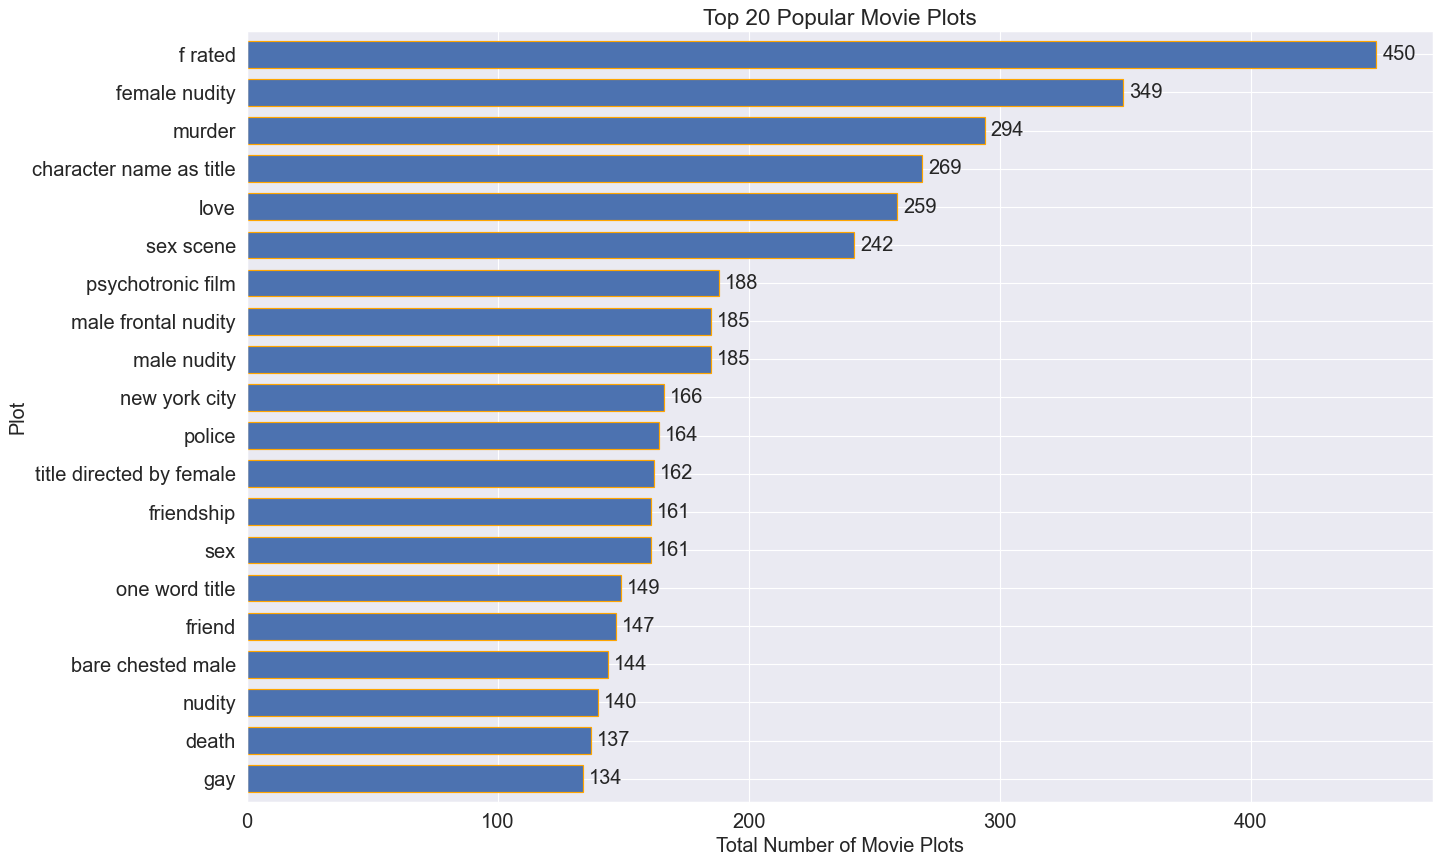

In [797]:
y_labels =movies_plot['plot_keywords']

# Plot the figure.
plt.figure(figsize=(18, 12), dpi=85)
ax = movies_plot ['count'].plot(kind='barh',color='b', fontsize=17,
                                           edgecolor='orange', width=.7)
ax.set_title('Top 20 Popular Movie Plots', fontsize=19)
ax.set_xlabel('Total Number of Movie Plots')
ax.set_ylabel('Plot')
ax.set_yticklabels(y_labels)

rects = ax.patches

for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    if x_value < 0:
        
        space *= -1

        ha = 'right'

    
    label = "{}".format(x_value)
    
     # Create annotation
    plt.annotate(label,(x_value, y_value),xytext=(space, 0),
                 textcoords="offset points",va='center',ha=ha, fontsize=17) 


### 5.2.5)  Number  of Movies Produced Annually

In [751]:
# Create dataframe containing only the movieId and genres
movies_year = pd.DataFrame(df_movies[['movieId', 'title']],columns=['movieId', 'title'])

movies_year= movies_year[movies_year['title'].notnull()]
# Split the year from title
movies_year.title = movies_year.title.apply(lambda x: x[-5:-1])

movies_year = movies_year.groupby(['title'])['movieId'].count().reset_index(name="count")
movies_year =movies_year[movies_year['count'] > 500]
movies_year =movies_year.sort_values(by='count',ascending=True)


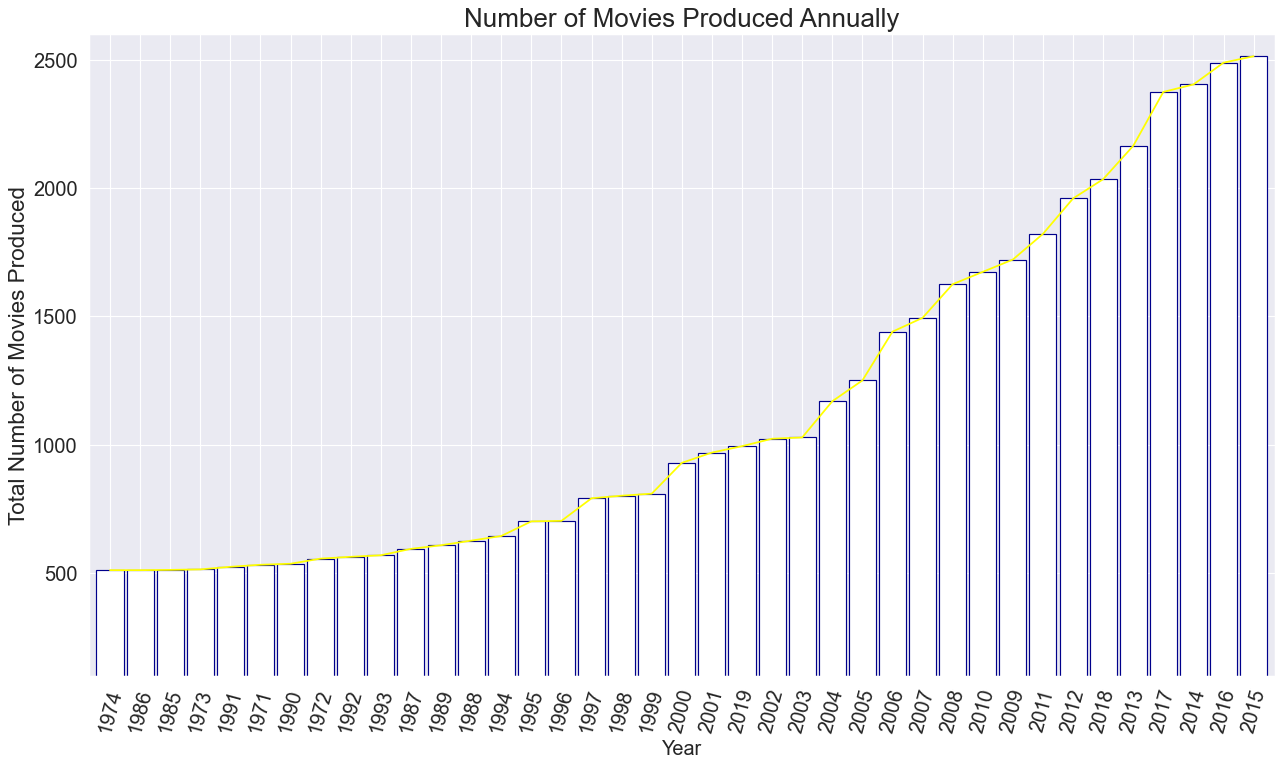

In [798]:
y_labels =movies_year['count']

# Plot the figure.
fig,ax = plt.subplots(figsize=(18, 10), dpi = 85)

movies_year[['count', 'title']].plot(x='title',kind='bar', color='white', fontsize=17, ylim=[100, 2600],
                                           width=.9, ax=ax, legend=False, edgecolor='darkblue')
                                     
movies_year.plot(x='title', kind = 'line', ax=ax, color='yellow', legend=False)
                                     
ax.set_title('Number of Movies Produced Annually', fontsize=22)
ax.set_xlabel('Year')
ax.set_ylabel('Total Number of Movies Produced', fontsize=19)
                                     
plt.xticks(rotation=75)
plt.show()

### 5.2.6)  Movie tags

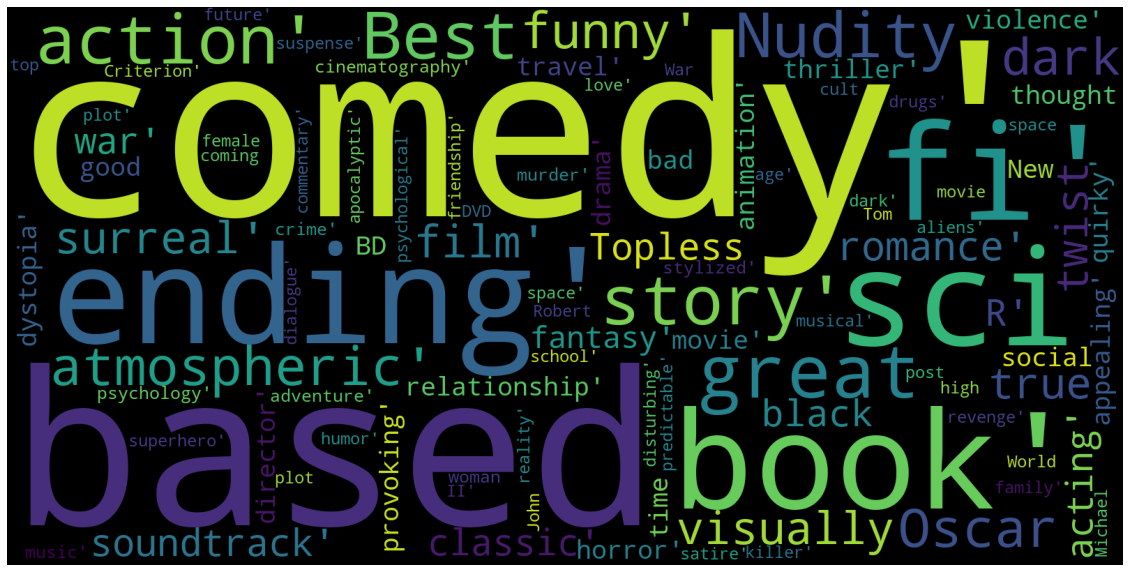

In [743]:
tags_2 =str(list(df_tags['tag']))
plt.figure(figsize = (20,20))
wc = WordCloud(background_color = "black", max_words = 100 , width = 1600 , height = 800,
               collocations=False).generate(tags_2)
plt.axis("off")
plt.imshow(wc)

### 5.2.6)  Merging Movies and IMdb Dataframe

In [799]:
merged_inner = pd.merge(left=df_movies, right=df_imdb, left_on='movieId', right_on='movieId')
merged_inner.head(2)

,movieId,title,genres,title_cast,director,runtime,budget,plot_keywords
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Jumanji (1995),Adventure|Children|Fantasy,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game


### 5.2.7)  Movie's Annual Budget 

In [800]:
movies_ =df_imdb.sort_values(by='budget',ascending=False)
print(movies_.budget.unique())

['ZAR10,000,000' 'VEB4,273,248' 'UAH10,000' ... '$1,000' '$0' nan]


The bugdet feature has different currency.In this notebook we will consider US dollars \\$ ,because most movies are in \\$ 

In [909]:
movies_budget = pd.DataFrame(merged_inner[['movieId', 'title','budget']],columns=['movieId', 'title','budget'])

movies_budget= movies_budget[movies_budget['title'].notnull()]

movies_budget['budget'].replace('', np.nan, inplace=True)
movies_budget.dropna(subset=['budget'], inplace=True)

# Split title seperated by "|" and create a list containing the title allocated to each movie
movies_budget.title = movies_budget.title.apply(lambda x: int(re.findall(r"\d\d\d\d",x).pop(0)))
  
movies_budget.budget = movies_budget.budget.apply(lambda x: int(locale.atof(str(x).strip("$"))) if str(x)[:1] =='$' else None )
movies_budget= movies_budget[movies_budget['budget'].notnull()]

The list of years and  the box and whisker shows that there was a movie released in the year 1000 , this cannot be true.The first basic movie was made in 1888. Also the data has movies made beyod 2021 (such as a movie made in 3000) this  values are cearly outliers.

In [910]:
print('list of movie\'s year of release :', list(pd.unique(movies_budget['title'])))

list of movie's year of release : [1995, 1994, 1996, 1992, 1993, 1991, 1990, 1997, 1600, 1998, 2000, 1999, 1900, 2001, 3000, 1989, 2002, 1956, 2003, 1000, 2004, 1983, 1492, 1984, 1985, 2046, 2005, 2006, 2009, 2007, 2008, 1408, 1976, 2012, 2010, 1974, 2011, 2016, 1911, 2013, 1968, 1942, 2014, 2050, 1453, 2015, 1988, 1981]


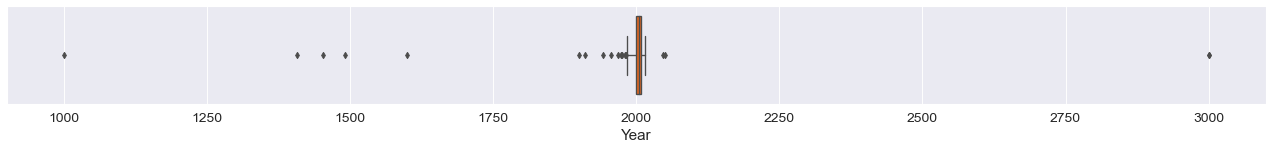

In [911]:
fig,ax = plt.subplots(figsize=(25, 2), dpi=65)
sns.boxplot(x='title', data=movies_budget, palette='hot')
ax.set_xlabel('Year')
plt.show()

We then select movies that are made from 1888 up until the current year 2021

In [884]:
movies_budget =movies_budget[movies_budget['title'] > 1888]
movies_budget =movies_budget[movies_budget['title'] <= 2021]

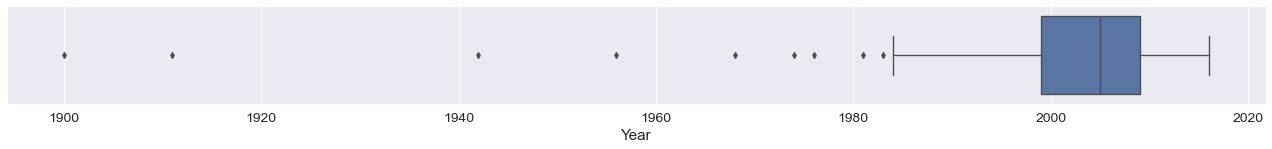

In [886]:
fig,ax = plt.subplots(figsize=(25, 2), dpi=65)
sns.boxplot(x = 'title', data = movies_budget, color='b')
ax.set_xlabel('Year')
plt.show()

The above box and whisker is skewed to the right,this is an indication that more movies where released from the late 90s.This is because of technogyical advances and more investment/budget to the production of movies.

In [887]:
movies_budget =movies_budget[movies_budget['title'] > 1995]
movies_budget =movies_budget[movies_budget['title'] <= 2012]
Total_movie_budget = movies_budget.groupby("title")["budget"].sum().reset_index(name="Sum of movie budget")
Total_movie_budget

,title,Sum of movie budget
0,1996,4.359255e+09
1,1997,5.592129e+09
2,1998,5.629174e+09
3,1999,7.113912e+09
4,2000,7.019107e+09
5,2001,6.981505e+09
6,2002,7.215973e+09
7,2003,6.989922e+09
8,2004,7.725236e+09
9,2005,7.908149e+09


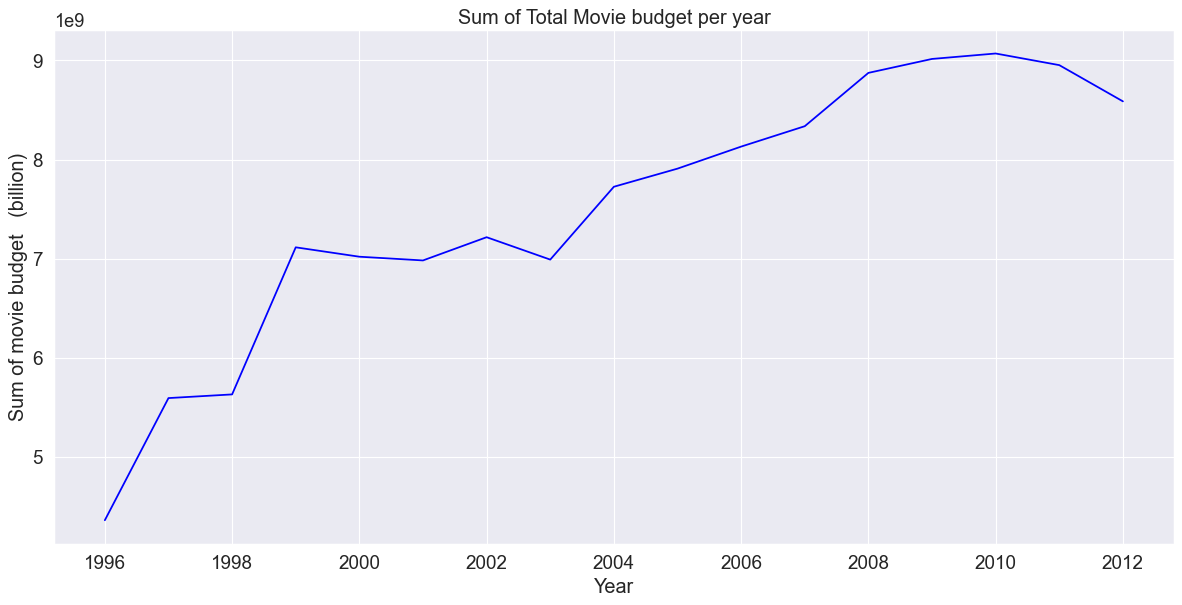

In [907]:
fig,ax = plt.subplots(figsize=(17, 8), dpi=85)

Total_movie_budget.plot.line(x='title',y='Sum of movie budget', ax=ax, color='blue', 
                             legend=False, fontsize=16)
ax.set_title('Sum of Total Movie budget per year')
ax.set_xlabel('Year')
ax.set_ylabel('Sum of movie budget   (billion)')

plt.show()

### 5.2.8)  User Movie rating plots

### Merging movie and train

In [914]:
merged_train = pd.merge(left=df_movies, right=df_train, left_on='movieId', right_on='movieId')
merged_train.head(2)

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,158849,5.0,994716786
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,97203,5.0,942683155


In [917]:
train_ = df_train.copy()
print("Total Number of Users who rated  movies:" ,len(train_['userId'].unique()))
print("Maximum movies rating :" ,merged_train['rating'].max())
print("Lowest movies rating :" ,merged_train['rating'].min())

Total Number of Users who rated  movies: 162541
Maximum movies rating : 5.0
Lowest movies rating : 0.5


In [918]:
print(merged_train.groupby(['rating'])['movieId'].count().reset_index(name="count"))

   rating    count
0     0.5   157571
1     1.0   311213
2     1.5   159731
3     2.0   656821
4     2.5   505578
5     3.0  1959759
6     3.5  1270642
7     4.0  2652977
8     4.5   880516
9     5.0  1445230


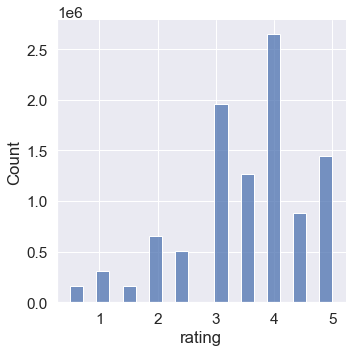

In [930]:
sns.displot(merged_train, x='rating',bins=20)
plt.show()

In [939]:
merged_train.rating = merged_train.rating.apply(lambda x: int(x))
Hi_rating_df =merged_train[merged_train['rating']==5]

Lo_rating_df =merged_train[merged_train['rating']==0]

Hi_rating_list =str(list(Hi_rating_df['title']))
Lo_rating_list =str(list(Lo_rating_df['title']))

### Movies that obtained the highest rating</h2>  

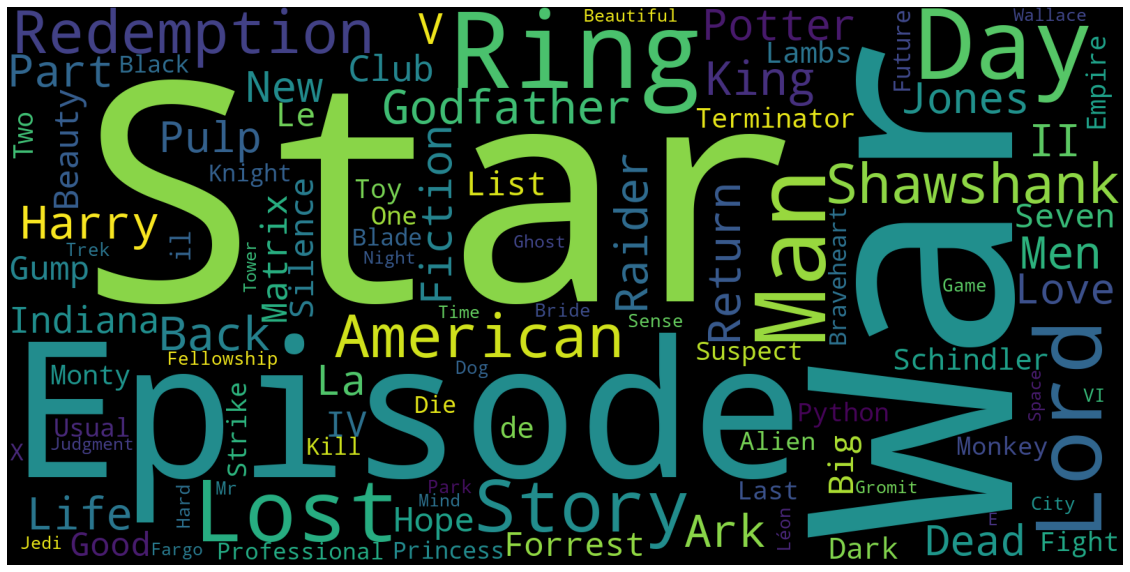

In [935]:
plt.figure(figsize = (20,20))
wc = WordCloud(background_color = "black", max_words = 100 , 
               width = 1600 , height = 800,collocations=False).generate(Hi_rating_list)
plt.axis("off")
plt.imshow(wc)

### Movies that obtained the Lowest rating</h2>

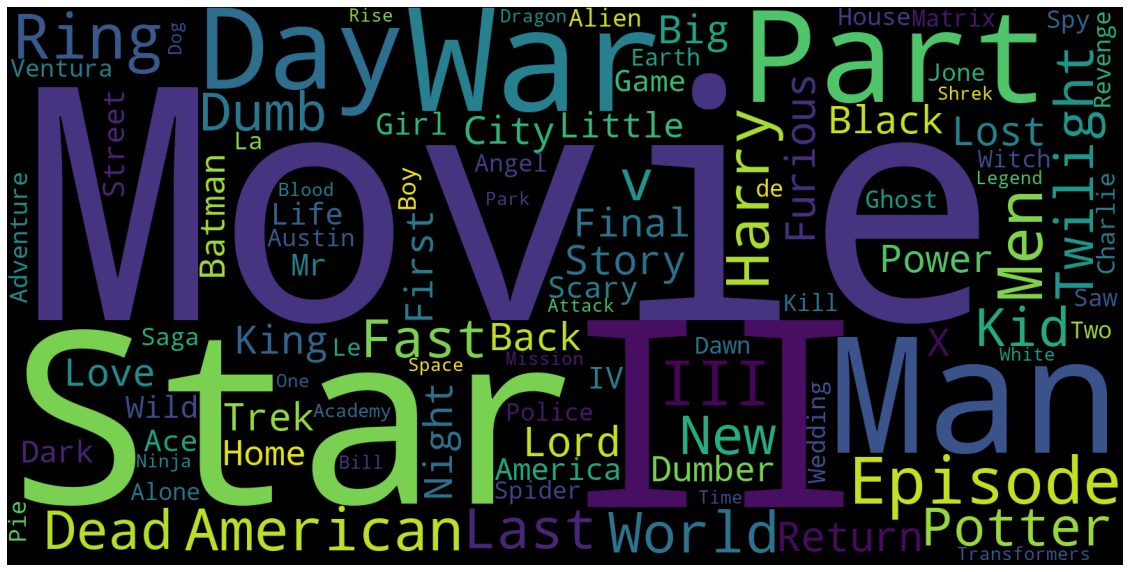

In [940]:
plt.figure(figsize = (20,20))
wc = WordCloud(background_color = "black", max_words = 100 , 
               width = 1600 , height = 800,collocations=False).generate(Lo_rating_list)
plt.axis("off")
plt.imshow(wc)

Some  movies such as the star wars movie, appears in the two word plot.This means its possible for a movie to recieve the highest and the lowest rating from different users.